<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/real_tashkent_houses_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tashkent houses predictor project

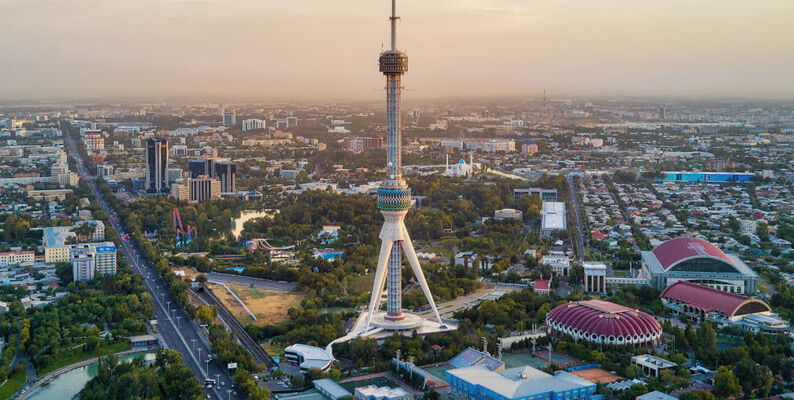

### About Dataset
<br>

**Context**

The dataset containt the prices for real estate in Tashkent, Uzbekistan. Data was scraped from uybor.uz, real-estate advertisement website. Data was scraped back in 2019.

<br> <br>

**Content**

***The dataset contains following columns:***

*address - approximate address of the real-estate*

*district - the district the real-estate located in*

*rooms - number of rooms*

*size - total size of the unit in square meters*

*level - which level the unit located at*

*max_levels - maximum levels of the building*

*price - price in USD*

*lat - latitude*

*lng - longitude*

### import necessary libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
# preprocesssing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # DL


# metrics for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

### loading dataset

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/hasanj0n/Datasets/main/uybor.csv")
df

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831
...,...,...,...,...,...,...,...,...,...
7416,"город Ташкент, Yashnobod район, Городок Авиаст...",Yashnobod,1,38.0,5,5,24500,41.292252,69.341907
7417,"город Ташкент, Yashnobod район, 1-й проезд Ави...",Yashnobod,2,49.0,1,4,32000,41.289606,69.343485
7418,"город Ташкент, Shayhontohur район, Зульфияханум",Shayhontohur,2,64.0,3,9,40000,41.331415,69.268901
7419,"город Ташкент, Mirzo Ulugbek район, Буюк Ипак ...",Mirzo Ulugbek,1,18.0,1,4,11000,41.310487,69.292223


### information about dataset

In [122]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


We have 9 columns: 2 category, 7 numeric, and have not nan values

In [123]:
# statistic information
df.describe()

,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


### Working with dataset

I think 'address' column not neccesary to our model, so I decide to drop the column.

In [124]:
df.drop("address", axis=1, inplace=True)

In [125]:
# number of nan values
df.isna().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

As I mentioned before, there is not nan values in dataset

In [126]:
# amount of duplicated values
df.duplicated().sum()

756

In [127]:
# dropping duplicated values
df.drop_duplicates(inplace=True)

In [128]:
df.shape

(6665, 8)

### Data visualization and correlation

In [129]:
df.corr()

<ipython-input-129-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rooms,size,level,max_levels,price,lat,lng
rooms,1.000000,0.783854,0.143565,0.187830,0.550745,0.010888,0.009449
size,0.783854,1.000000,0.168926,0.282715,0.784077,0.024738,0.068376
level,0.143565,0.168926,1.000000,0.599384,0.066606,-0.032720,0.042899
max_levels,0.187830,0.282715,0.599384,1.000000,0.227776,-0.063138,0.043405
price,0.550745,0.784077,0.066606,0.227776,1.000000,0.015881,0.079842
lat,0.010888,0.024738,-0.032720,-0.063138,0.015881,1.000000,0.521201
lng,0.009449,0.068376,0.042899,0.043405,0.079842,0.521201,1.000000


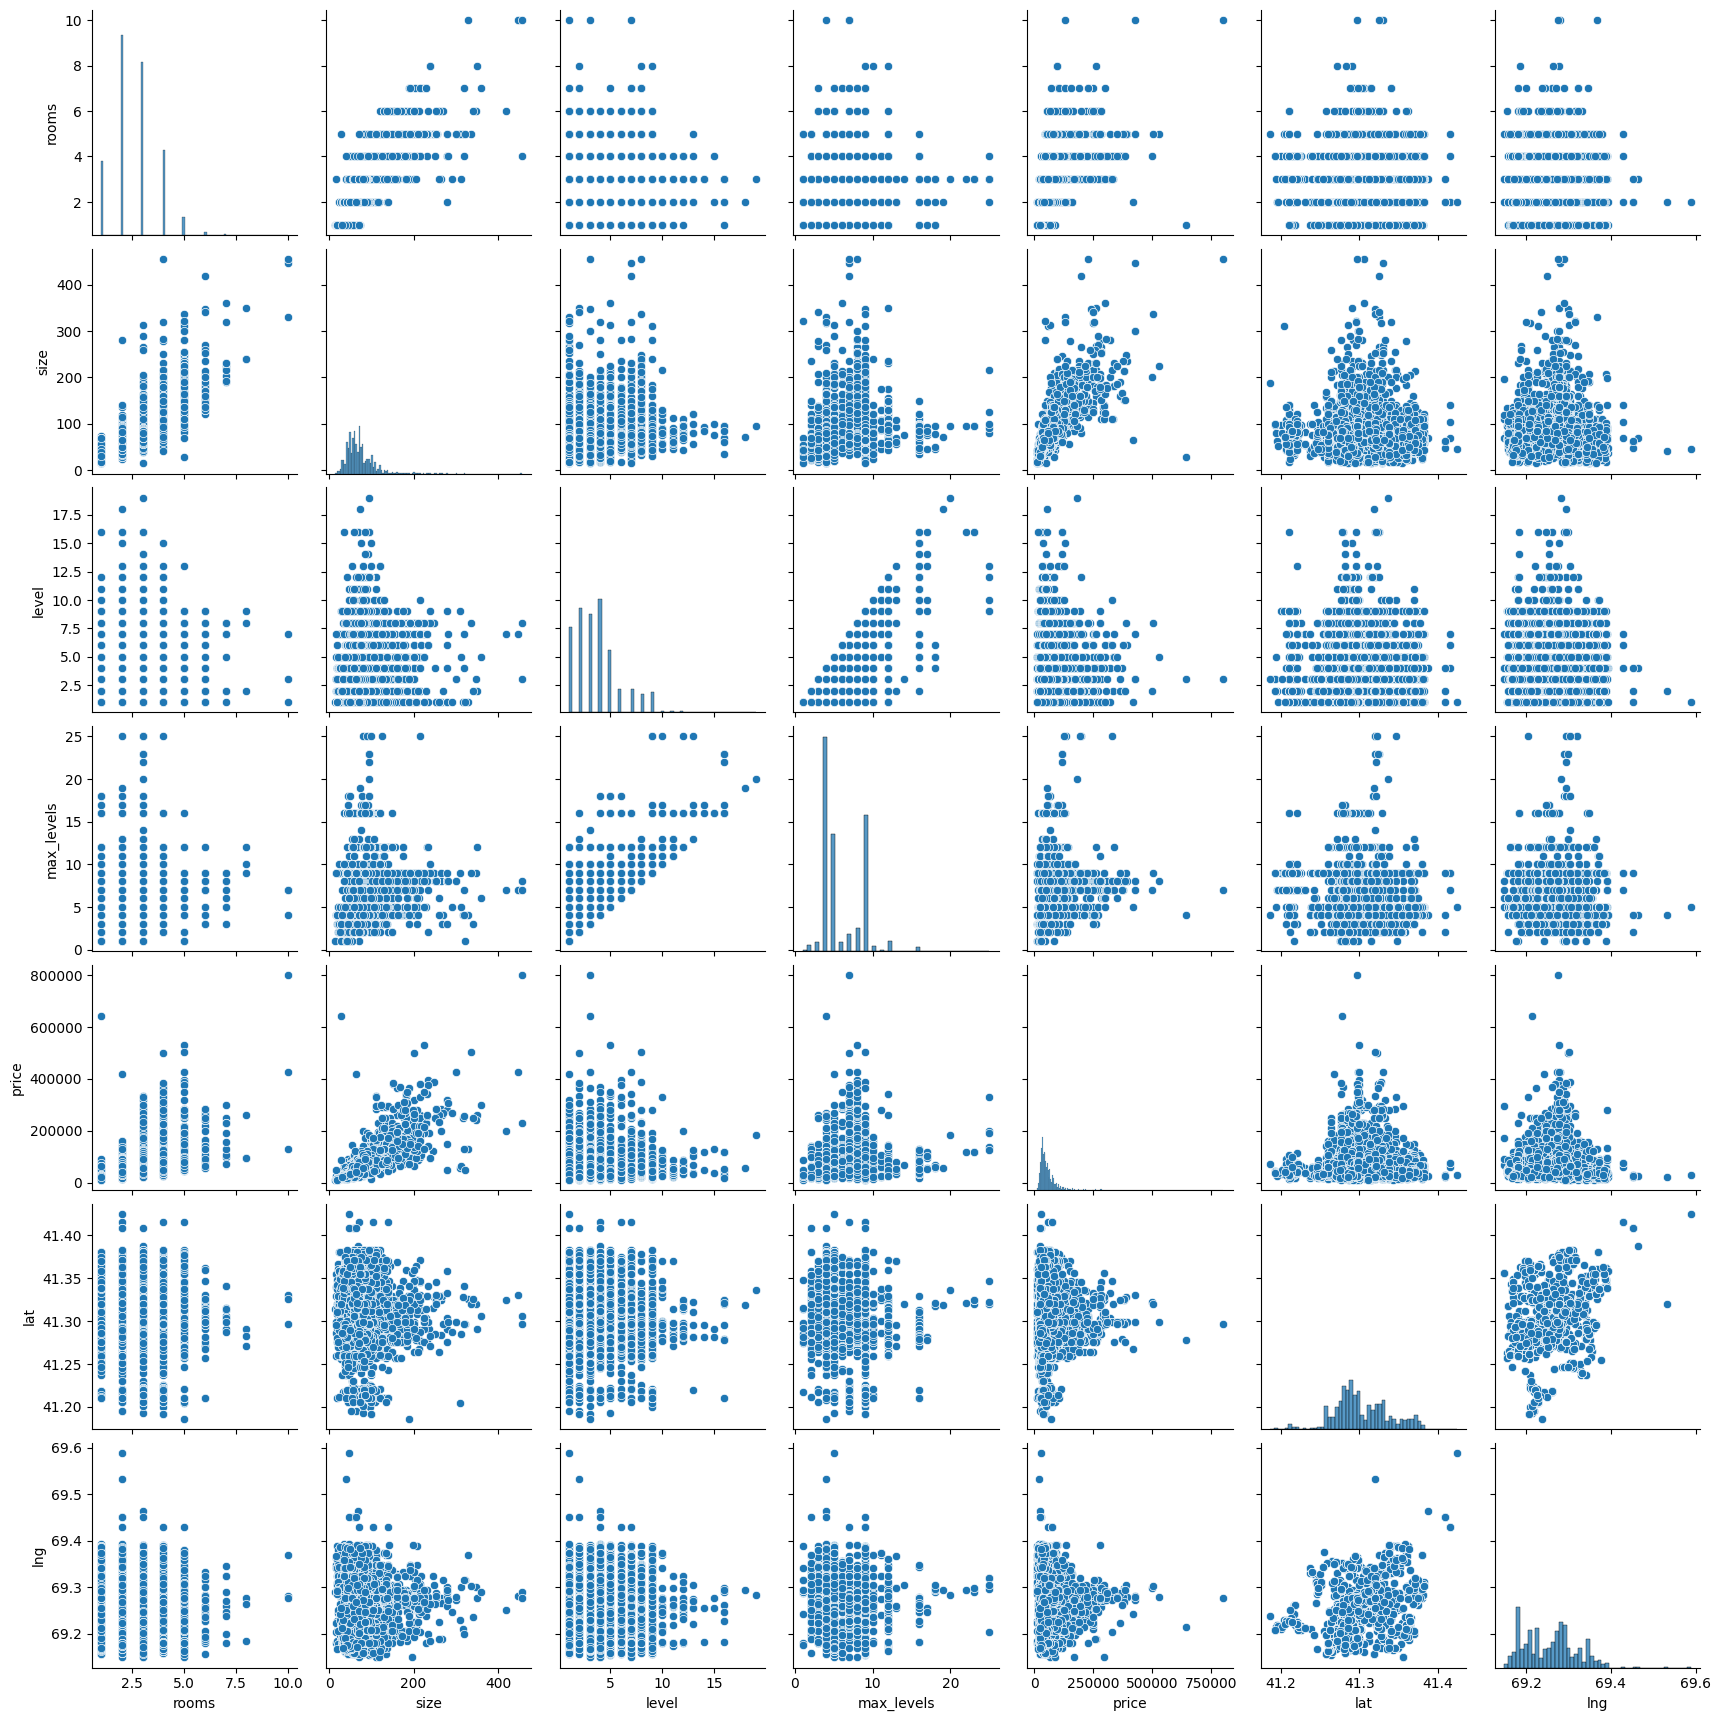

In [130]:
sns.pairplot(df)
plt.show()

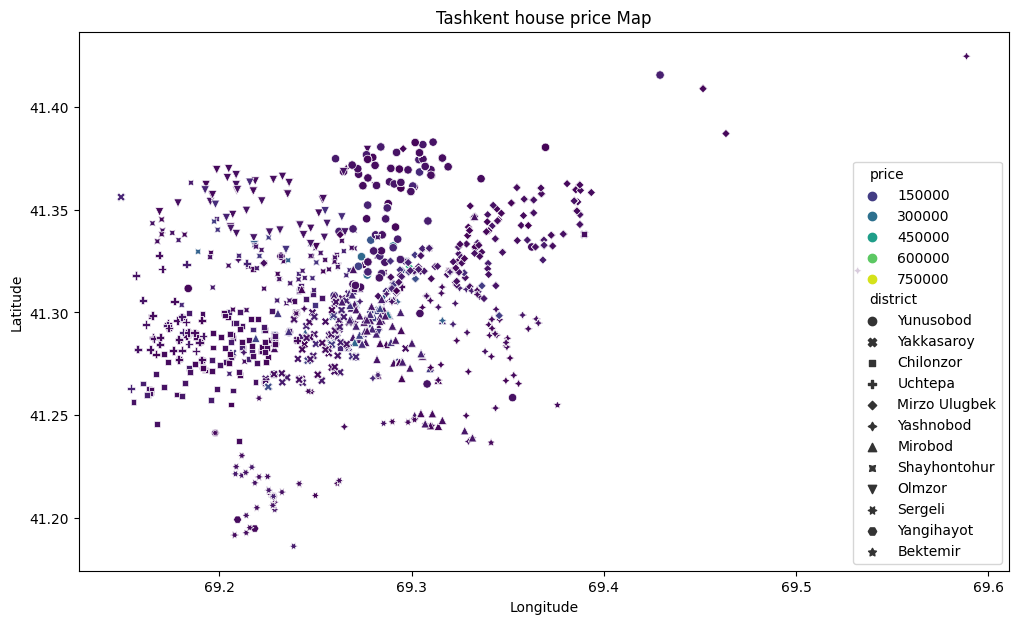

In [131]:
plt.figure(figsize=[12,7])
plt.title("Tashkent house price Map")
sns.scatterplot(df, x="lng", y="lat", hue="price", style="district",palette='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

![link text](https://upload.wikimedia.org/wikipedia/commons/9/97/Tashkent_Subdivisions_HorLegend.svg)

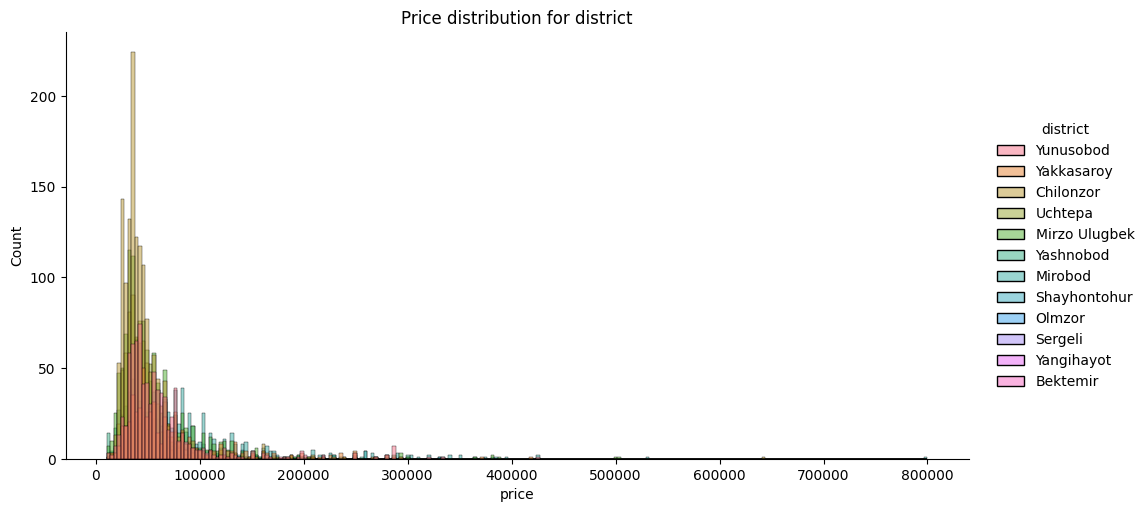

In [132]:
sns.displot(df, x="price", height=5, aspect=2, hue='district')
plt.title("Price distribution for district")
plt.show()

In [133]:
df.corrwith(df.price).sort_values(ascending=False)

<ipython-input-133-01ba8241159c>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.price).sort_values(ascending=False)


price         1.000000
size          0.784077
rooms         0.550745
max_levels    0.227776
lng           0.079842
level         0.066606
lat           0.015881
dtype: float64

<ipython-input-134-f4d2841688e6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap="binary")


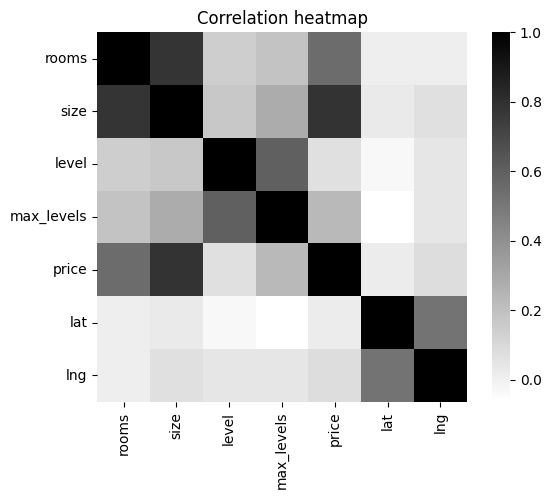

In [134]:
sns.heatmap(df.corr(), square=True, cmap="binary")
plt.title("Correlation heatmap")
plt.show()

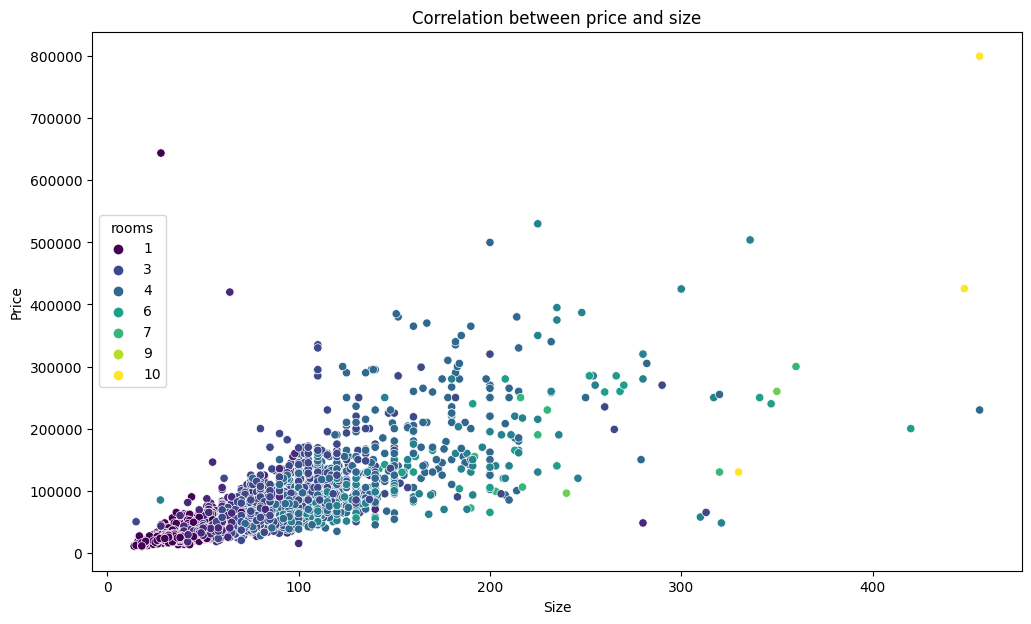

In [135]:
plt.figure(figsize=[12,7])
plt.title("Correlation between price and size")
sns.scatterplot(df, x="size", y="price", hue="rooms", palette='viridis')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

### Preprocessing for ML

In [136]:
df.drop("district", axis=1, inplace=True)

In [137]:
X = df.drop("price", axis=1)
y = df[["price"]]

In [ ]:
# std_scaler = StandardScaler()
# X_std = std_scaler.fit_transform(X)
# X_std
X_std = X

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Machine Learning

#### LinearRegression

In [140]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X=X_test)
y_pred_lr

array([[50370.65065892],
       [60790.57955211],
       [22289.68198489],
       ...,
       [44754.13408281],
       [67053.4589531 ],
       [33922.34098528]])

In [141]:
scores = cross_val_score(lr_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

Mean absolute error: 14548.018722201608
 
Cross Validation: 14847.710234462042


#### Lasso

In [142]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X=X_test)
y_pred_lasso

array([50390.32496338, 60784.7160739 , 22296.00049301, ...,
       44716.92321451, 67055.11521887, 33932.5704122 ])

In [143]:
scores = cross_val_score(lasso_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_lasso)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

Mean absolute error: 14549.5543467546
 
Cross Validation: 14850.08303551457


#### DecisionTree Regressor

In [144]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X=X_test)
y_pred_tree

array([49500., 68000., 28200., ..., 29500., 85000., 21000.])

In [145]:
scores = cross_val_score(tree_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_tree)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

Mean absolute error: 13385.363715928981
 
Cross Validation: 14374.915254238498


#### RandomForest Regressor

In [146]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X=X_test)
y_pred_rf

<ipython-input-146-4ee84da4398a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


array([48898.       , 81581.4047619, 28506.732    , ..., 29680.       ,
       94551.95     , 39081.26     ])

In [147]:
scores = cross_val_score(rf_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Mean absolute error: 10413.101618143985
 
Cross Validation: 11187.686883809132


#### Support Vector Regressor

In [148]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X=X_test)
y_pred_svr

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([46792.14821355, 47107.75282462, 46277.11905971, ...,
       46617.94669111, 47104.36048909, 46442.85589363])

In [149]:
scores = cross_val_score(svr_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_svr)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean absolute error: 24928.94305546469
 
Cross Validation: 24658.832197899923


####KNeighborsRegressor

In [150]:
knr_model = KNeighborsRegressor()
knr_model.fit(X_train, y_train)
y_pred_knr = knr_model.predict(X=X_test)
y_pred_knr

array([[46740. ],
       [67500. ],
       [25962.8],
       ...,
       [32400. ],
       [72780. ],
       [41296.2]])

In [151]:
scores = cross_val_score(knr_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_knr)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

Mean absolute error: 13510.44891222806
 
Cross Validation: 14163.225580272929


#### MLPRegressor

In [152]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X=X_test)
y_pred_mlp

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([54278.16536351, 66115.57856432, 27276.47522486, ...,
       46502.51437045, 65025.54281102, 39454.47073203])

In [153]:
scores = cross_val_score(mlp_model, X_std, y, cv=10, scoring='neg_mean_absolute_error')
mae = mean_absolute_error(y_test, y_pred_mlp)
print(f"Mean absolute error: {mae}\n \nCross Validation: {-scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

Mean absolute error: 16165.332847975951
 
Cross Validation: 15578.175122894041


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Saving model

Best Model to this problem was **RandomForest Regressor**, so we save this model

In [164]:
import pickle
filename = "model.pkl"
with open(filename, "wb") as file:
  pickle.dump(rf_model, file)

In [156]:
X_std

,rooms,size,level,max_levels,lat,lng
0,3,57.0,4,4,41.371471,69.281049
1,2,52.0,4,5,41.291115,69.261104
2,2,42.0,4,4,41.280784,69.223683
3,3,65.0,1,4,41.290163,69.196862
4,3,70.0,3,5,41.300156,69.210831
...,...,...,...,...,...,...
7416,1,38.0,5,5,41.292252,69.341907
7417,2,49.0,1,4,41.289606,69.343485
7418,2,64.0,3,9,41.331415,69.268901
7419,1,18.0,1,4,41.310487,69.292223


In [162]:
rf_model.predict(X_std.loc[[0]])

48342.39

In [160]:
X_std.loc[0]

rooms          3.000000
size          57.000000
level          4.000000
max_levels     4.000000
lat           41.371471
lng           69.281049
Name: 0, dtype: float64

In [165]:
with open(filename, "rb") as file:
  model = pickle.load(file)

In [166]:
model.predict(X_std.loc[[0]])

array([48342.39])